In [1]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
import utils
import cv2

In [2]:
coco = COCO('./data/train.json')

loading annotations into memory...
Done (t=1.28s)
creating index...
index created!


In [3]:
coco.cats.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [7]:
coco.getCatIds() # 라벨

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
image_id = coco.getImgIds(imgIds=0)
coco.loadImgs(image_id)[0]

{'license': 0,
 'url': None,
 'file_name': 'batch_01_vt/0003.jpg',
 'height': 512,
 'width': 512,
 'date_captured': None,
 'id': 0}

In [8]:
coco.loadCats(coco.getCatIds())

[{'id': 0, 'name': 'UNKNOWN', 'supercategory': 'UNKNOWN'},
 {'id': 1, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 2, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 3, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 4, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 5, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 6, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 7, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 8, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 9, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 10, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [9]:
class_name_list = ['Background']

In [10]:
for i in range(len(coco.getCatIds())):
    class_name_list.append(coco.loadCats(coco.getCatIds())[i]['name'])

In [11]:
class_name_list

['Background',
 'UNKNOWN',
 'General trash',
 'Paper',
 'Paper pack',
 'Metal',
 'Glass',
 'Plastic',
 'Styrofoam',
 'Plastic bag',
 'Battery',
 'Clothing']

In [64]:
image_infos = coco.loadImgs(0)[0]
image_infos

{'license': 0,
 'url': None,
 'file_name': 'batch_01_vt/0003.jpg',
 'height': 512,
 'width': 512,
 'date_captured': None,
 'id': 0}

In [2]:
dataset_path = '/home/seongwoo/workspace/DataScience_ML-DL/DL/assignment/trash_detection/data'

In [3]:
images = '/home/seongwoo/workspace/DataScience_ML-DL/DL/assignment/trash_detection/data/batch_03/0676.jpg'

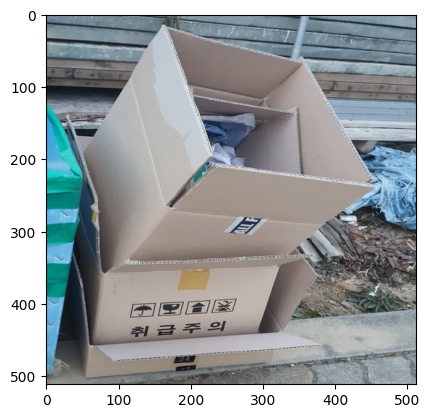

In [44]:
image = cv2.imread(images, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
# image = torch.tensor(image)
# sample = image.transpose(0,1,2)
plt.imshow(img) 

In [41]:
image.shape

(512, 512, 3)

In [8]:
import matplotlib.pyplot as plt

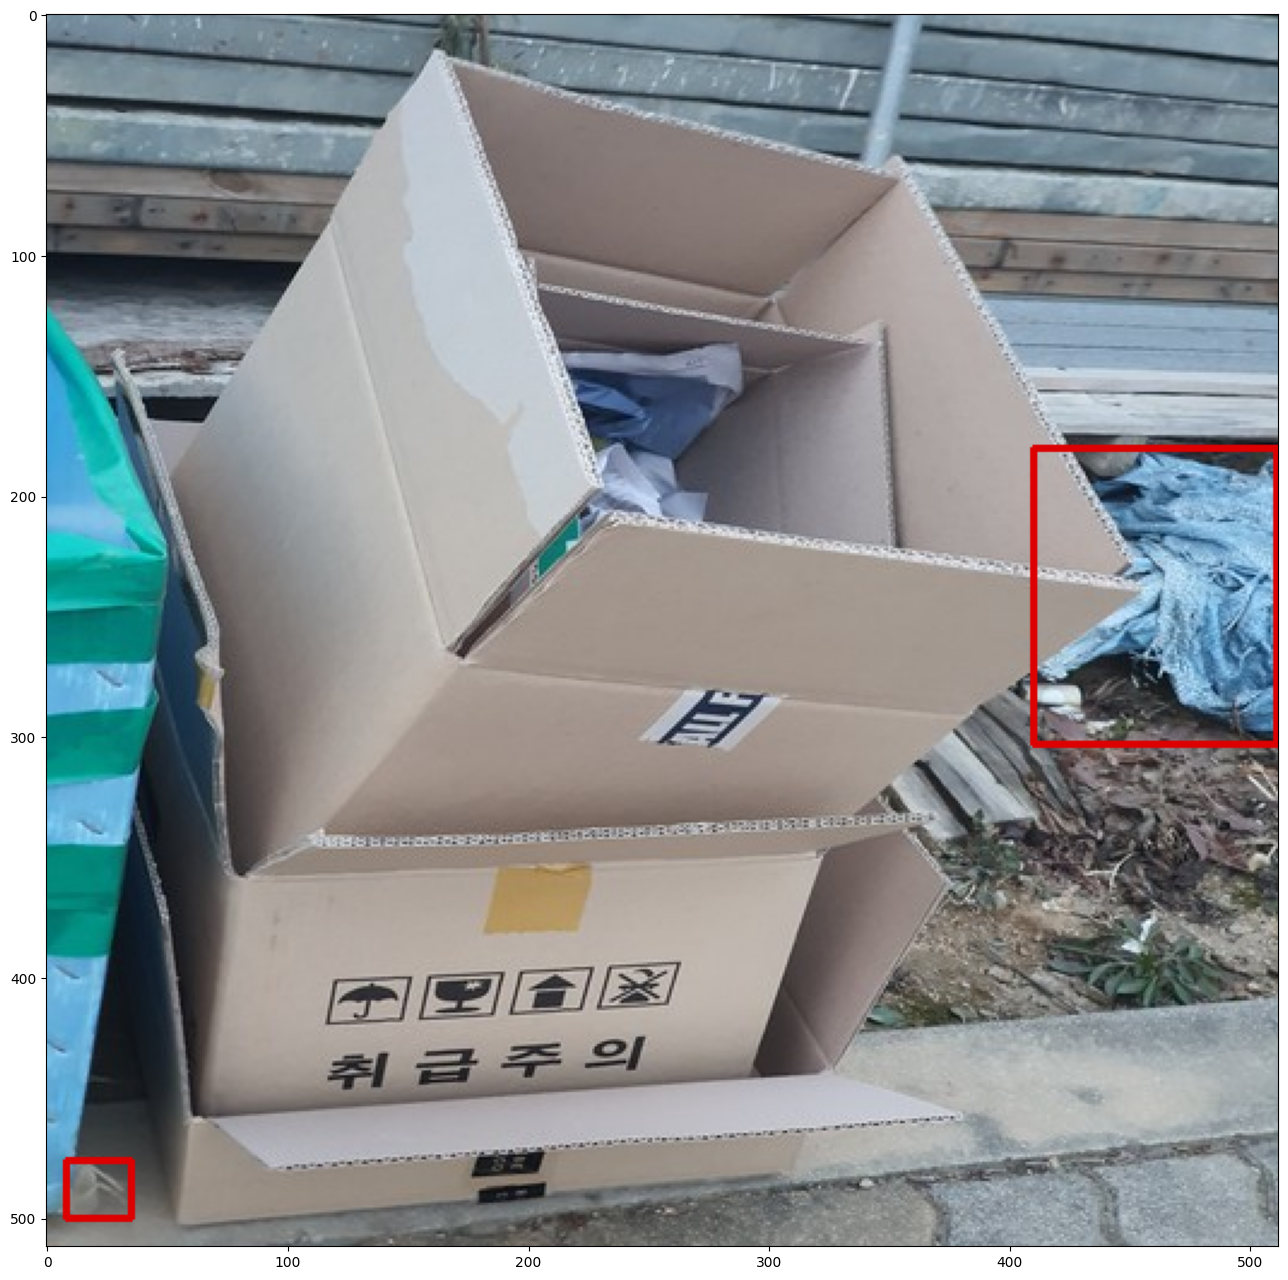

In [48]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# test = np.zeros((600, 600, 3), np.uint8)
cv2.rectangle(img, (410, 180),(511, 303), (220,0,0), 2)
cv2.rectangle(img, (8, 476),(35, 500), (220,0,0), 2)
# ax.set_axis_off()
plt.figure(figsize = (16,16))
plt.imshow(img)

In [43]:
cv2.destroyAllWindows()

In [42]:
img = cv2.imread(os.path.join(dataset_path, coco.loadImgs(0)[0]['file_name']))

In [43]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32).transpose(2,0,1)#.shape
t_img = torch.tensor(img)
t_img

tensor([[[130., 131., 131.,  ..., 122., 123., 124.],
         [129., 129., 131.,  ..., 122., 123., 124.],
         [128., 129., 130.,  ..., 122., 123., 123.],
         ...,
         [152., 152., 152.,  ..., 101., 101., 101.],
         [153., 153., 153.,  ..., 100., 101., 101.],
         [153., 154., 154.,  ..., 100., 100., 101.]],

        [[107., 108., 108.,  ..., 101., 103., 104.],
         [106., 106., 108.,  ..., 101., 103., 104.],
         [105., 106., 107.,  ..., 101., 103., 103.],
         ...,
         [116., 116., 116.,  ...,  57.,  57.,  57.],
         [117., 117., 117.,  ...,  56.,  57.,  57.],
         [117., 118., 118.,  ...,  56.,  56.,  57.]],

        [[ 89.,  90.,  90.,  ...,  80.,  79.,  80.],
         [ 88.,  88.,  90.,  ...,  80.,  79.,  80.],
         [ 87.,  88.,  89.,  ...,  80.,  79.,  79.],
         ...,
         [ 90.,  90.,  90.,  ...,  20.,  20.,  20.],
         [ 91.,  91.,  91.,  ...,  19.,  20.,  20.],
         [ 91.,  92.,  92.,  ...,  19.,  19.,  20.]]]

In [74]:
coco.getImgIds(imgIds=1000)

[1000]

In [65]:
ann_ids = coco.getAnnIds(imgIds=image_infos['id']) # object 수
ann_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [76]:
coco.loadImgs(image_id)[0]

{'license': 0,
 'url': None,
 'file_name': 'batch_01_vt/0003.jpg',
 'height': 512,
 'width': 512,
 'date_captured': None,
 'id': 0}

In [83]:
anns = coco.loadAnns(ann_ids)
aa = [ann['image_id'] for ann in anns]
aa
# bbox = anns[1]['bbox']
# switch_bbox = [bbox[0]-bbox[2], bbox[1]-bbox[3], bbox[0], bbox[1]]
# [xmax, ymax, ]
# switch_bbox

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [85]:
anns[1]['bbox']+[anns[1]['category_id']]

[331.9, 193.4, 64.8, 48.4, 8]

In [65]:
# boxes (``FloatTensor[N, 4]``): the ground-truth boxes in ``[x1, y1, x2, y2]`` format, with
# ``0 <= x1 < x2 <= W`` and ``0 <= y1 < y2 <= H``.
target = {}

In [67]:
bboxes = []
labels = []
area = []
# masks = []
for i in range(len(anns)):
    bbox = anns[i]['bbox']
    switch_bbox = [bbox[0]-bbox[2], bbox[1]-bbox[3], bbox[0], bbox[1]]
    # masks.append(anns[i]["segmentation"])
    area.append(anns[i]['area'])
    bboxes.append(switch_bbox)
    labels.append(anns[i]['category_id'])


boxes = torch.as_tensor(bboxes, dtype = torch.float32)
labels = torch.as_tensor(labels, dtype=torch.int64)
# image_id = torch.tensor([idx])
iscrowd = torch.zeros((len(anns),), dtype=torch.int64)

target["boxes"] = boxes
target["labels"] = labels
# target["masks"] = masks
target["image_id"] = image_id
target["area"] = area
target["iscrowd"] = iscrowd

In [68]:
target["area"]

[79999.0,
 1623.0,
 327.5,
 369.5,
 400.0,
 1043.0,
 655.5,
 373.0,
 1273.0,
 153.0,
 211.5,
 680.5,
 2249.0,
 7564.5]

In [62]:
len(coco.getImgIds())

2617

In [57]:
import torch
import torchvision
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights, ssd300_vgg16, SSD300_VGG16_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from dataset import COCO_dataformat
import engine

import utils
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import transforms as T

img = read_image("/home/seongwoo/workspace/DataScience_ML-DL/DL/lecture/detection_segmentation/SSD/voc_data/다운로드 (1).jpeg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.85)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=2, font_size=20)
im = to_pil_image(box.detach())
im.show()

/home/seongwoo/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")
